## Time Series Analysis for Investment Suggestions between Stock Markets Worldwide and Cryptocurrency Market
###                                                                                                                 Project By - Daksh Intwala

### Domain Introduction
Investments in ETFs/ETPs/Securities/Bonds can be highly profitable if done with sufficient knowledge along the consideration of calculated risk involved. 

Statics suggests:

1. US citizens trade/use/owne securities - 58% ~ 191 million people
2. US citizens trade/use/own crypto currency - 59 million people
3. Bitcoin volume traded worldwide : USD 31,649,988,229 for 24hrs from 2022/05/17
4. Volume Traded on Nasdaq market alone on 2022/05/17 (one day) - 
                                     Share Volume	 Dollar Volume
                   Total Volume:	5,077,252,885   USD 229,809,702,455


 References: 
 
    1. https://news.gallup.com/poll/266807/percentage-americans-owns-stock.aspx
    2. https://www.finder.com/how-many-people-own-cryptocurrenc
    3. http://www.nasdaqtrader.com/Trader.aspx?id=DailyMarketSummary  
    4. https://coinmarketcap.com/currencies/bitcoin/

#### So, we can figure out how important it is to know which is a better option to invest Stock or Crypto?

### Data Summary  
All datasets used in the project deals with 7 fields:

1. **Date** - (datetime format) the day for which the data is recorded. In stocks it shows 9:30am - 4pm. For bitcoin it represents 24hr timeline.
2. **Open** -  (int) Opening price of the stock/crypto currency
3. **High** -  (int) Highest price of the stock/crypto currency during the day
4. **Low**  -  (int) Lowest price of the stock/crypto currency
5. **Close** - (int) Closing price of the stock/crypto currency
6. **Adj. Close** - (int) Adjacent Closing price of the stock/crypto currency (Price value after accounting)
7. **Volume** - (int) Number of the stock/crypto currency traded.

Stock Indexs Used: 
1. NASDAQ Composite - National Association of Securities Dealers Automated Quotations, 
2. NYSE - NewYork Stock Exchange, 
3. TSX - Toronto Stock Exchange, 
4. UKX - United Kingdom Exchange, 
5. BSE - Bombay Stock Exchange

Total Datasets used: **10**

Data Source: https://finance.yahoo.com

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.signal import savgol_filter
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.stats import levene, bartlett, normaltest, ttest_ind

In [2]:
#Version
print("Pandas : ", pd.__version__)
print("Seaborn : ", sns.__version__)
print("numpy : ", np.__version__)

Pandas :  1.3.4
Seaborn :  0.11.2
numpy :  1.20.3


### Loadind the stock data

In [3]:
df_nasdaq = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/stock/86 Nasdaq.csv")
df_nyse = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/stock/86 NYSE.csv")
df_tsx = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/stock/86 TSX HistoricalPrices-3.csv")
df_ukx = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/stock/86 UKX HistoricalPrices.csv")
df_bse = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/stock/86 BSE_HistoricalPrices.csv")

In [4]:
# df_nasdaq.head()
# df_nyse.head()
# df_tsx.head()
# df_ukx.head()
# df_bse.head()

## Cleaning and Merging

In [5]:
# Renaming the columns

df_nasdaq = df_nasdaq.rename(columns={'Date':'date',
                                     'Open':'na_open',
                                     'High':'na_high',
                                     'Low':'na_low',
                                     'Close':'na_close',
                                     'Adj Close':'na_adj_close',
                                     'Volume':'na_volume'}
                 )

df_nyse = df_nyse.rename(columns={'Date':'date',
                                     'Open':'nys_open',
                                     'High':'nys_high',
                                     'Low':'nys_low',
                                     'Close':'nys_close',
                                     'Adj Close':'nys_adj_close',
                                     'Volume':'nys_volume'}
            )

df_tsx = df_tsx.rename(columns={'Date':'date',
                                     ' Open':'t_open',
                                     ' High':'t_high',
                                     ' Low':'t_low',
                                     ' Close':'t_close'}
                
            )

df_ukx = df_ukx.rename(columns={'Date':'date',
                                     ' Open':'u_open',
                                     ' High':'u_high',
                                     ' Low':'u_low',
                                     ' Close':'u_close'}    
            )

df_bse = df_bse.rename(columns={'Date':'date',
                                     ' Open':'b_open',
                                     ' High':'b_high',
                                     ' Low':'b_low',
                                     ' Close':'b_close'}
                
            )

Cleaned data with new renamed columns

### Merging the stock datasets together

In [6]:
# Unifying datetime column
def unify_date(df):
    df['date'] = pd.to_datetime(df['date'])
    print('Done!')


In [7]:
unify_date(df_nasdaq)
unify_date(df_nyse)
unify_date(df_tsx)
unify_date(df_ukx)
unify_date(df_bse)

Done!
Done!
Done!
Done!
Done!


Cleaned data with datetime format for date column

In [8]:
df_stock = df_nasdaq.merge(df_nyse, on='date')
df_stock = df_stock.merge(df_tsx, on='date')
df_stock = df_stock.merge(df_ukx, on='date')
df_stock = df_stock.merge(df_bse, on='date')

In [9]:
df_stock.head(3)

,date,na_open,na_high,na_low,na_close,na_adj_close,na_volume,nys_open,nys_high,nys_low,...,t_low,t_close,u_open,u_high,u_low,u_close,b_open,b_high,b_low,b_close
0,1986-01-02,325.000000,325.600006,324.799988,325.000000,325.000000,75810000,1276.670044,1276.670044,1276.670044,...,2881.5,2881.5,1420.5,1420.5,1420.5,1420.5,549.43,549.43,549.43,549.43
1,1986-01-03,325.200012,325.700012,324.799988,325.700012,325.700012,89180000,1284.709961,1284.709961,1284.709961,...,2881.4,2881.4,1429.8,1429.8,1429.8,1429.8,561.01,561.01,561.01,561.01
2,1986-01-06,325.500000,326.200012,325.299988,326.000000,326.000000,99240000,1283.439941,1283.439941,1283.439941,...,2867.2,2867.2,1424.1,1424.1,1424.1,1424.1,561.01,561.01,561.01,561.01


In [10]:
## Setting Date as Index
df_stock_copy = df_stock #setting out a copy for later use
df_stock = df_stock.set_index('date')

Reindexed data with date column as index

### Data Exploration

In [11]:
# Null Check
df_stock.isna().sum()

na_open          0
na_high          0
na_low           0
na_close         0
na_adj_close     0
na_volume        0
nys_open         0
nys_high         0
nys_low          0
nys_close        0
nys_adj_close    0
nys_volume       0
t_open           0
t_high           0
t_low            0
t_close          0
u_open           0
u_high           0
u_low            0
u_close          0
b_open           0
b_high           0
b_low            0
b_close          0
dtype: int64

No Null Values in the dataset

In [12]:
#Removing unwanted columns (Adjcent Close - Because it is only used for corporate accounting purposes.)

df_stock=df_stock.drop(['na_adj_close','nys_adj_close'], axis=1)

In [13]:
# Integers check
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8630 entries, 1986-01-02 to 2022-05-13
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   na_open     8630 non-null   float64
 1   na_high     8630 non-null   float64
 2   na_low      8630 non-null   float64
 3   na_close    8630 non-null   float64
 4   na_volume   8630 non-null   int64  
 5   nys_open    8630 non-null   float64
 6   nys_high    8630 non-null   float64
 7   nys_low     8630 non-null   float64
 8   nys_close   8630 non-null   float64
 9   nys_volume  8630 non-null   int64  
 10  t_open      8630 non-null   float64
 11  t_high      8630 non-null   float64
 12  t_low       8630 non-null   float64
 13  t_close     8630 non-null   float64
 14  u_open      8630 non-null   float64
 15  u_high      8630 non-null   float64
 16  u_low       8630 non-null   float64
 17  u_close     8630 non-null   float64
 18  b_open      8630 non-null   float64
 19  b_high   

Total records = 8630,
datetime column = 1,
integer columns = 2,
float columns = 22

### Custom Function

In [14]:
### Automated Labeling Plots

## Function for setting labels and title of plots  #Used in Midterm, created by - Daksh Intwala.
def auto_label(x='',y='',title='',sl=16,st=20):
    font_t = {'size':st, 'family':'serif'}
    font_l = {'size':sl, 'family':'serif'}
    plt.xlabel(x, fontdict=font_l)
    plt.ylabel(y, fontdict=font_l)
    plt.title(title, fontdict=font_t)

## Univariate Analysis
### Distribution

#### NASDAQ Index

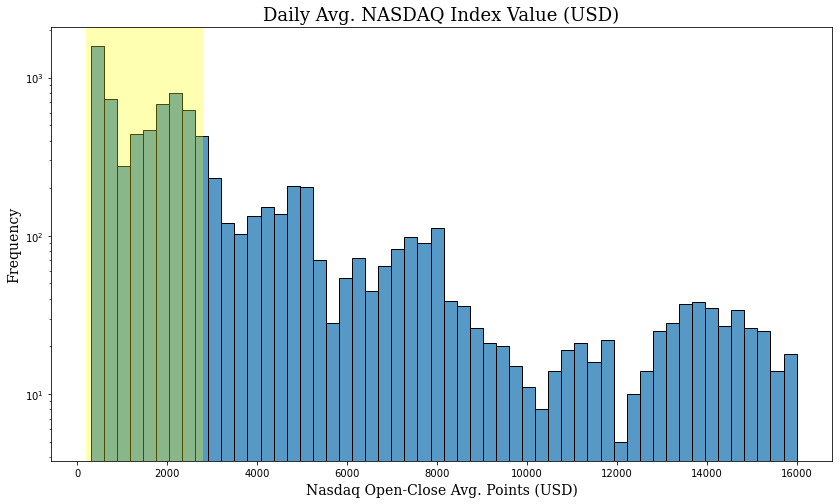

In [15]:
plt.figure(figsize=(14,8))
avg_na = (df_stock['na_open']+df_stock['na_close'])/2
plot = sns.histplot(avg_na)

auto_label('Nasdaq Open-Close Avg. Points (USD)', 
           'Frequency', 'Daily Avg. NASDAQ Index Value (USD)', 
           sl=14, 
           st=18 )

plt.axvspan(200, 2800, color='yellow', alpha=0.3, lw=0)
plt.yscale('log')
plt.show()


The daily average doesn't follow normal distribution

#### NYSE Index

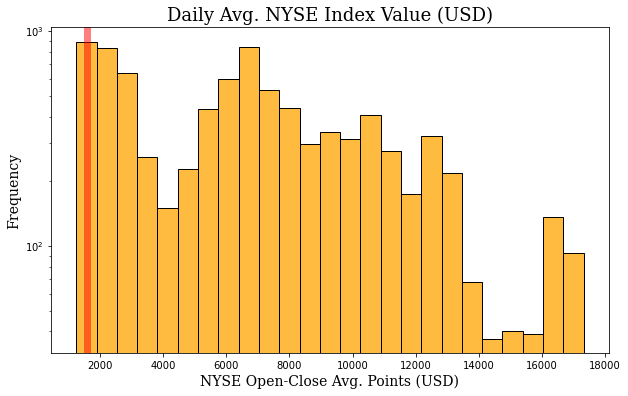

In [16]:
plt.figure(figsize=(10,6))
avg_nys=(df_stock['nys_open']+df_stock['nys_close'])/2
plot = sns.histplot(avg_nys, color='orange')

auto_label('NYSE Open-Close Avg. Points (USD)', 
           'Frequency', 'Daily Avg. NYSE Index Value (USD)', 
           sl=14, 
           st=18 )
plt.axvspan(1500, 1700, color='red', alpha=0.5, lw=0)
plt.yscale('log')
plt.show()


The daily average doesn't follow normal distribution

#### TSX Index

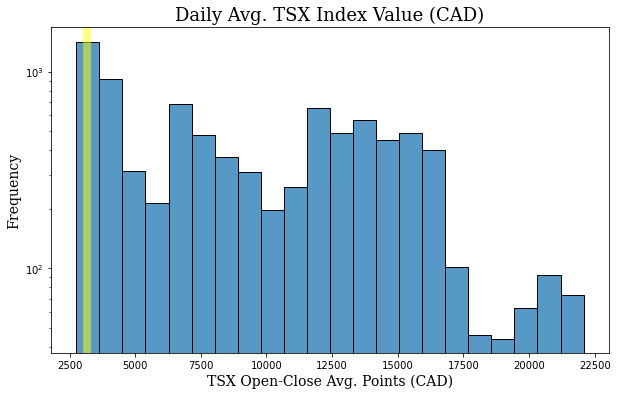

In [17]:
plt.figure(figsize=(10,6))
avg_t = (df_stock['t_open']+df_stock['t_close'])/2
plot = sns.histplot(avg_t)

auto_label('TSX Open-Close Avg. Points (CAD)', 
           'Frequency', 'Daily Avg. TSX Index Value (CAD)', 
           sl=14, 
           st=18 )
plt.axvspan(3000, 3300, color='yellow', alpha=0.5, lw=0)
plt.yscale('log')
plt.show()


The daily average doesn't follow normal distribution

#### UKX Index

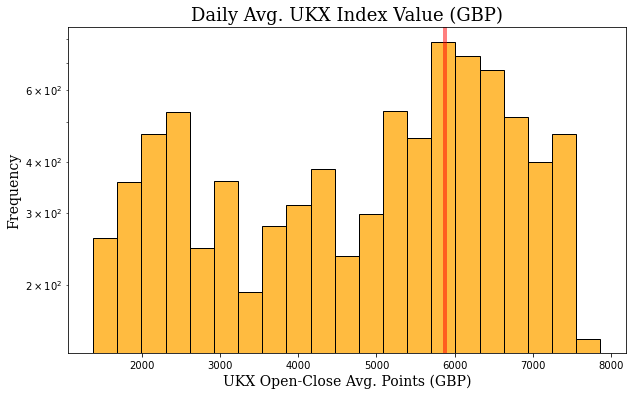

In [18]:
plt.figure(figsize=(10,6))
avg_u = (df_stock['u_open']+df_stock['u_close'])/2
plot = sns.histplot(avg_u, color='orange')

auto_label('UKX Open-Close Avg. Points (GBP)', 
           'Frequency', 
           'Daily Avg. UKX Index Value (GBP)', 
           sl=14, 
           st=18 )
plt.axvspan(5850, 5900, color='red', alpha=0.5, lw=0)
plt.yscale('log')
plt.show()


The daily average doesn't follow normal distribution

#### BSE Index

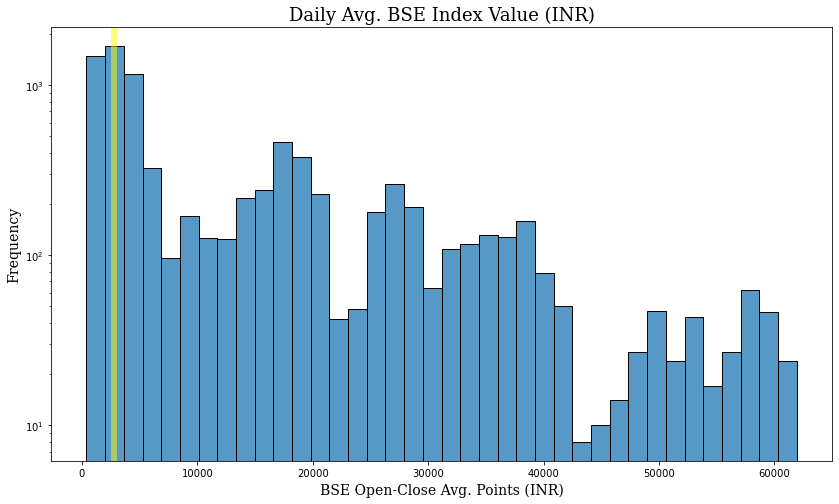

In [19]:
plt.figure(figsize=(14,8))
avg_b = (df_stock['b_open']+df_stock['b_close'])/2
plot = sns.histplot(avg_b)

auto_label('BSE Open-Close Avg. Points (INR)', 
           'Frequency', 
           'Daily Avg. BSE Index Value (INR)', 
            sl=14, 
            st=18 )

plt.axvspan(2500, 3000, color='yellow', alpha=0.5, lw=0)


plt.yscale('log')
plt.show()


The daily average doesn't follow normal distribution

## Bivariate Analysis


### Opening-Closing Points

In [20]:
def finding_max(year1,year2,name):
    range_df = df_stock[year1:year2]
    return range_df[name].max()

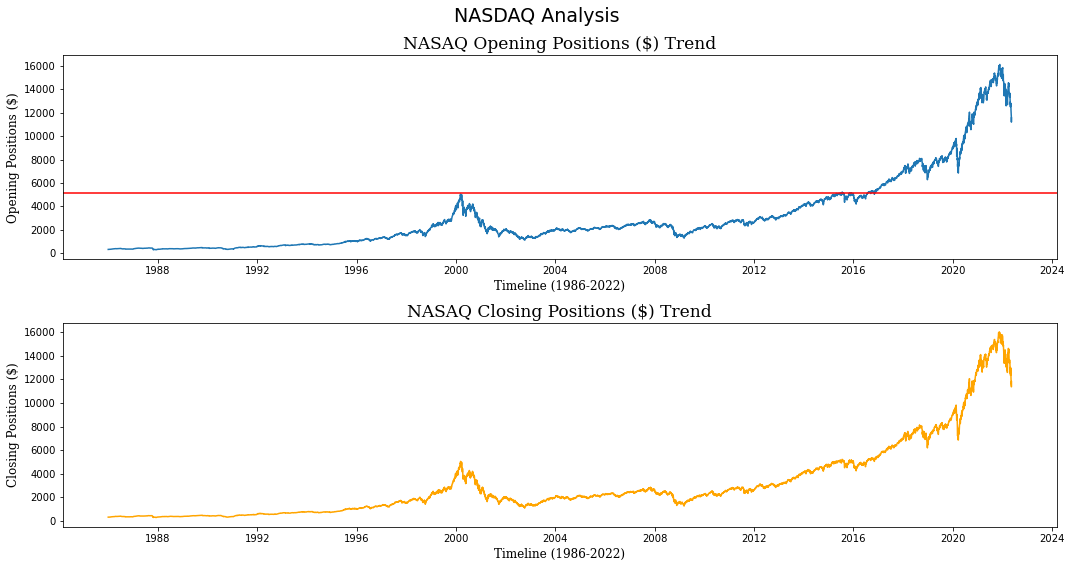

Number of companies in Nasdaq - 2500
NASDAQ never recovered from DOT COM crash until 2016, slowest recovery


In [21]:
plt.figure(figsize=(15,8))
plt.suptitle('NASDAQ Analysis', size=19)

plt.subplot(2,1,1)
plt.plot(df_stock['na_open'])


plt.axhline(y= finding_max('1999-01-01', '2001-01-01', 'na_high' ), 
            color='r', 
            linestyle='-')

auto_label(x='Timeline (1986-2022)', 
           y='Opening Positions ($)',
           title='NASAQ Opening Positions ($) Trend',
           st=17, sl=12)


plt.subplot(2,1,2)
plt.plot(df_stock['na_close'],c='orange')

auto_label(x='Timeline (1986-2022)', 
           y='Closing Positions ($)',
           title='NASAQ Closing Positions ($) Trend',
           st=17, sl=12)

plt.tight_layout()
plt.show()


print('Number of companies in Nasdaq - 2500')
print('NASDAQ never recovered from DOT COM crash until 2016, slowest recovery')

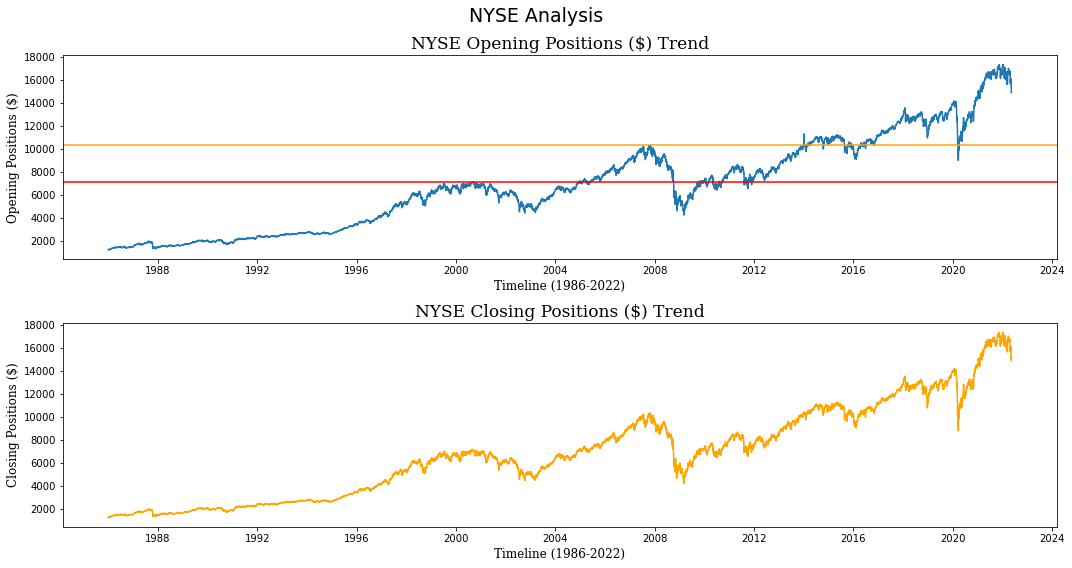

Number of companies in NYSE - 2800
NYSE recovered quickle after dot com crash in 2004, 2yrs period


In [22]:
plt.figure(figsize=(15,8))
plt.suptitle('NYSE Analysis', size=19)

plt.subplot(2,1,1)
plt.plot(df_stock['nys_open'])

plt.axhline(y=  finding_max('1999-01-01', '2001-01-01', 'nys_high' ), 
            color='r', 
            linestyle='-')

plt.axhline(y=  finding_max('2007-01-01', '2008-06-01', 'nys_high' ), 
            color='orange', 
            linestyle='-')

auto_label(x='Timeline (1986-2022)', 
           y='Opening Positions ($)',
           title='NYSE Opening Positions ($) Trend',
           st=17, sl=12)


plt.subplot(2,1,2)
plt.plot(df_stock['nys_close'],c='orange')

auto_label(x='Timeline (1986-2022)', 
           y='Closing Positions ($)',
           title='NYSE Closing Positions ($) Trend',
           st=17, sl=12)

plt.tight_layout()
plt.show()

print('Number of companies in NYSE - 2800')
print('NYSE recovered quickle after dot com crash in 2004, 2yrs period')

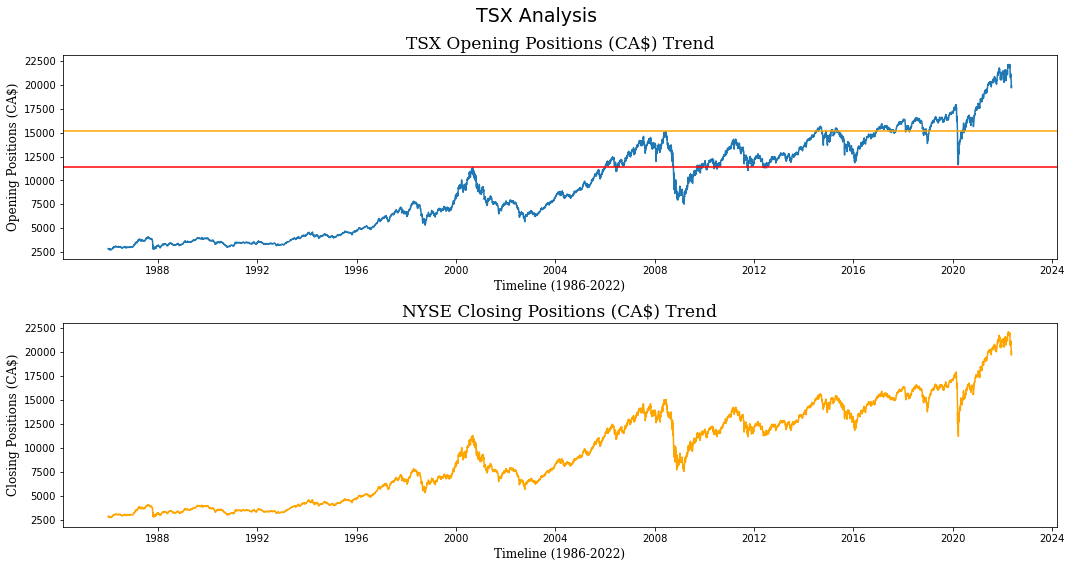

Number of companies in TSX - 250
TSX 


In [23]:
plt.figure(figsize=(15,8))
plt.suptitle('TSX Analysis', size=19)

plt.subplot(2,1,1)
plt.plot(df_stock['t_open'])

auto_label(x='Timeline (1986-2022)', 
           y='Opening Positions (CA$)',
           title='TSX Opening Positions (CA$) Trend',
           st=17, sl=12)

plt.axhline(y=  finding_max('1999-01-01', '2001-01-01', 't_high' ), 
            color='r', 
            linestyle='-')

plt.axhline(y=  finding_max('2007-01-01', '2008-06-01', 't_high' ), 
            color='orange', 
            linestyle='-')

plt.subplot(2,1,2)
plt.plot(df_stock['t_close'],c='orange')

auto_label(x='Timeline (1986-2022)', 
           y='Closing Positions (CA$)',
           title='NYSE Closing Positions (CA$) Trend',
           st=17, sl=12)

plt.tight_layout()
plt.show()

print('Number of companies in TSX - 250')
print('TSX ')

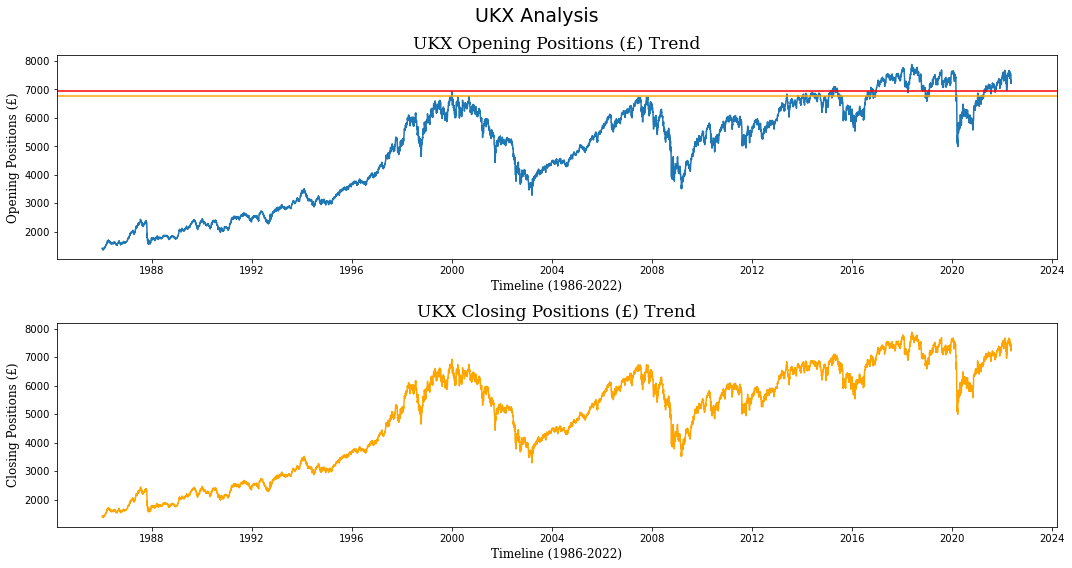

Number of companies in UKX - 1500


In [24]:
plt.figure(figsize=(15,8))
plt.suptitle('UKX Analysis', size=19)

plt.subplot(2,1,1)
plt.plot(df_stock['u_open'])

auto_label(x='Timeline (1986-2022)', 
           y='Opening Positions (£)',
           title='UKX Opening Positions (£) Trend',
           st=17, sl=12)


plt.axhline(y=  finding_max('1999-01-01', '2001-01-01', 'u_high' ), 
            color='r', 
            linestyle='-')

plt.axhline(y=  finding_max('2007-01-01', '2008-06-01', 'u_high' ), 
            color='orange',
            linestyle='-')
            
plt.subplot(2,1,2)
plt.plot(df_stock['u_close'],c='orange')

auto_label(x='Timeline (1986-2022)', 
           y='Closing Positions (£)',
           title='UKX Closing Positions (£) Trend',
           st=17, sl=12)

plt.tight_layout()
plt.show()

print('Number of companies in UKX - 1500')

Growth Rate almost Stagnant after recovery

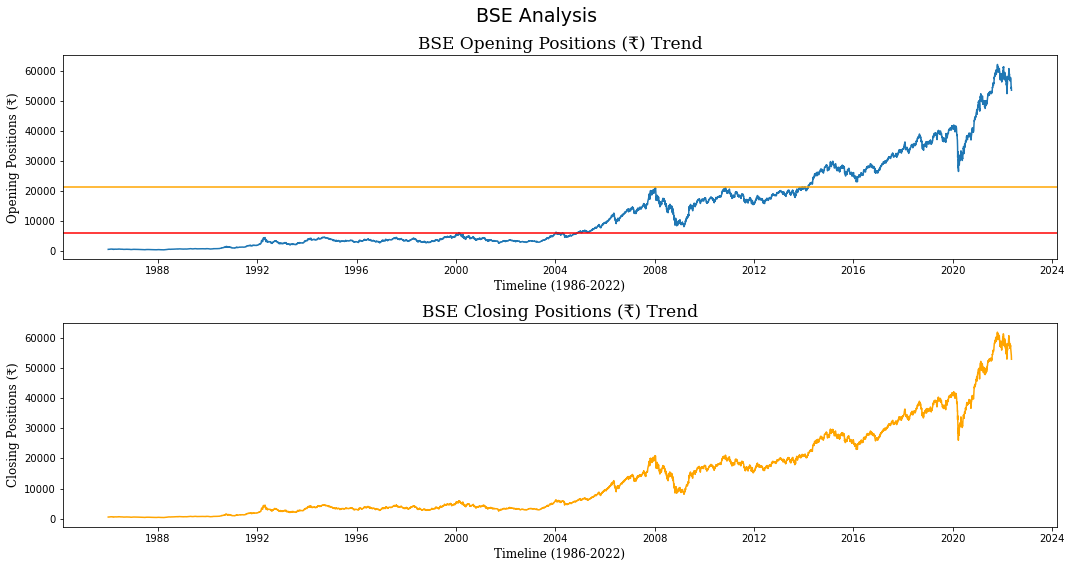

Number of companies in BSE - 5,261


In [25]:
plt.figure(figsize=(15,8))
plt.suptitle('BSE Analysis', size=19)

plt.subplot(2,1,1)
plt.plot(df_stock['b_open'])

auto_label(x='Timeline (1986-2022)', 
           y='Opening Positions (₹)',
           title='BSE Opening Positions (₹) Trend',
           st=17, sl=12)


plt.axhline(y=  finding_max('1999-01-01', '2001-01-01', 'b_high' ), 
            color='r', 
            linestyle='-')
plt.axhline(y=  finding_max('2007-01-01', '2008-06-01', 'b_high' ), 
            color='orange',
            linestyle='-')

plt.subplot(2,1,2)
plt.plot(df_stock['b_close'],c='orange')

auto_label(x='Timeline (1986-2022)', 
           y='Closing Positions (₹)',
           title='BSE Closing Positions (₹) Trend',
           st=17, sl=12)

plt.tight_layout()
plt.show()

print('Number of companies in BSE - 5,261')

BSE Hit worst in 2008, as major FIIs were withdrawn from the market.

BSE hit less worst in 2000 probably because India had fewer IT companies then.

Indian Software market at that time -  **USD 5.7 Billion**
whereas in USA it was - **USD 102 Billion**

References:

https://crawford.anu.edu.au/acde/asarc/pdf/papers/2002/WP2002_06.pdf

https://www.statista.com/statistics/203244/packaged-software-industry-revenue-in-the-us-since-2000/

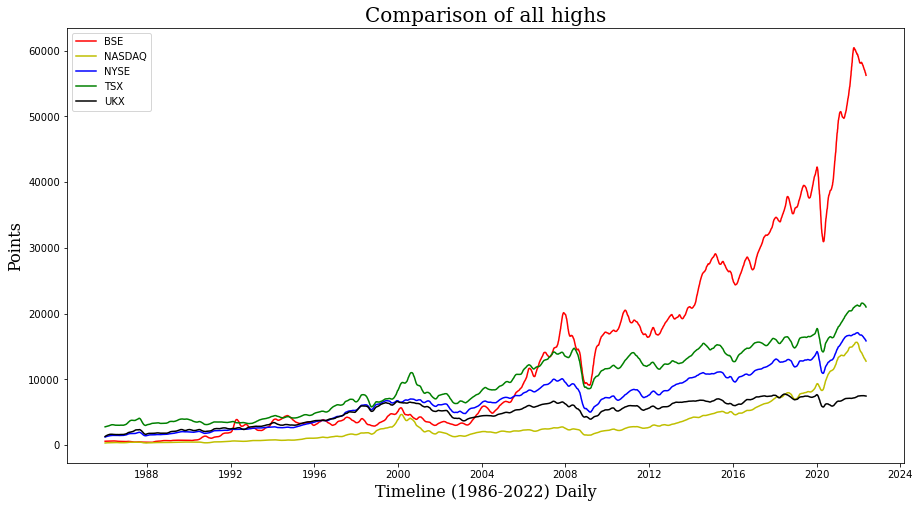

In [26]:
## Highest of all five indexes

#BSE
plt.figure(figsize=(15,8))
plt.plot(df_stock_copy['date'],
         savgol_filter(df_stock['b_high'],101,2),   
         color='r',
         label='BSE')

#NASDAQ
plt.plot(df_stock_copy['date'],
         savgol_filter(df_stock['na_high'],101,2),   
         color='y',
         label='NASDAQ')

#NYSE
plt.plot(df_stock_copy['date'],
         savgol_filter(df_stock['nys_high'],101,2),   
         color='b',
         label='NYSE')

#TSX
plt.plot(df_stock_copy['date'],
         savgol_filter(df_stock['t_high'],101,2),   
         color='g',
         label='TSX')

#UKX
plt.plot(df_stock_copy['date'],
         savgol_filter(df_stock['u_high'],101,2),   
         color='k',
         label='UKX')

plt.legend(loc='best')
auto_label('Timeline (1986-2022) Daily','Points', 'Comparison of all highs')
plt.show()



#### Sanity Check 1 - Causes of fluctuations are not data discrepencies, they are because of real-life events

2000 - Dot com Burst

2008 - Loan Recession

2016 - Oil Price Drop - 12year low, $30 a barrel, China Economy growth projection 4-6% instead of 9-10%
But Bounced back due to Trump election win and measures like Infrastructure Growth Fund allocation
2020 - Covid Pandemic

References:
    https://www.fool.com/investing/general/2016/01/29/3-reasons-the-market-has-crashed-in-2016-and-why-t.aspx

Highest and Lowest point of each day don't have much difference in trend

### Analysing growing potentials

In [27]:
def plot_2point(name,color,conv1,conv2,l):
    y_val = [df_stock[name][0]*conv1, df_stock[name][-1:]*conv2]
    x_val = [1986,2022]
    plt.plot(x_val, y_val, color = color, label=l)

#### CURRENCY Transformation

Rates (05/18/22) taken as:

1. 1 CAD = 0.78 USD
2. 1 GBP = 1.24 USD
3. 1 INR = 0.013 USD

Rates for 01-01-1986 taken as:

1. 1 CAD = 0.713 USD
2. 1 GBP = 1.47 USD
3. 1 INR = 0.079 USD

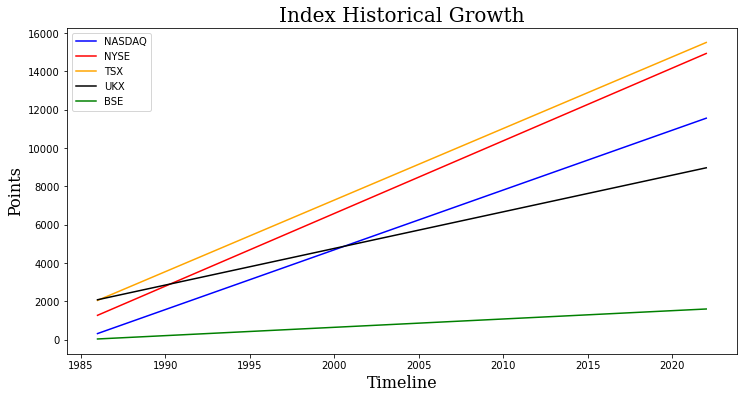

In [28]:
plt.figure(figsize=(12,6))
plot_2point('na_open','b',1,1,'NASDAQ')
plot_2point('nys_open','r',1,1,'NYSE')
plot_2point('t_open','orange',0.713,0.78,'TSX')
plot_2point('u_open','k',1.47,1.24,'UKX')
plot_2point('b_open','g',0.079,0.03,'BSE')

auto_label('Timeline', 'Points','Index Historical Growth')
plt.legend(loc='best')

plt.show()

**NYSE and TSX** have **high** growth potential

BSE has lowest growth potential

### Sanity check 2- Claim: NYSE better than NASDAQ for dynamic investors
### EVIDENCE 1 - Volume Traded

### NYSE Volume

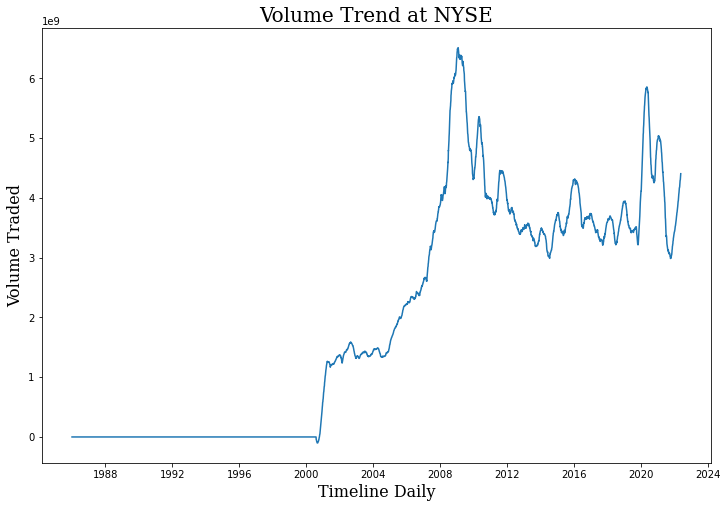

In [29]:
plt.figure(figsize=(12,8))
plt.plot(df_stock_copy['date'],savgol_filter(df_stock['nys_volume'],201,2))
# plt.plot(df_stock_copy['date'], df_stock['nys_volume'],201,2)
auto_label('Timeline Daily','Volume Traded','Volume Trend at NYSE')
plt.show()

NYSE is a reflective market. 

More shares were offloaded at the recession period in 2008.

Its highly likely that people will try to load off their stock positions to be safe from potential losses.

***NYSE securities seems to be good fit for Dynamic Investors*** 

### NASDAQ Volume

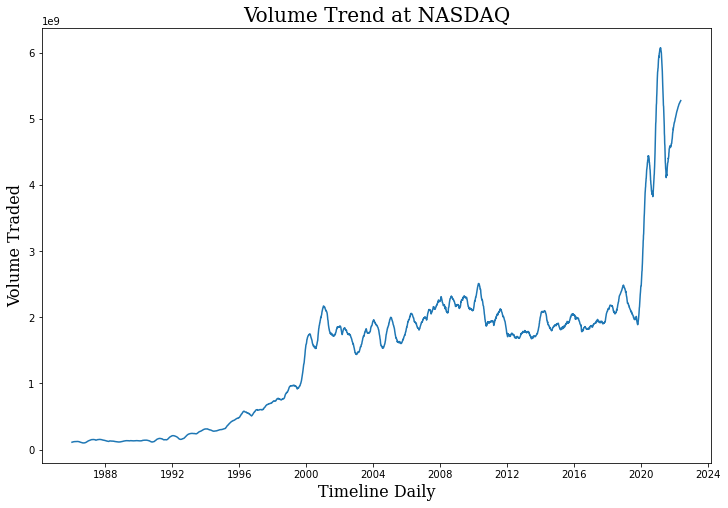

In [30]:
plt.figure(figsize=(12,8))
# plt.plot(df_stock_copy['date'], df_stock['na_volume'])
plt.plot(df_stock_copy['date'], savgol_filter(df_stock['na_volume'],201,2))
auto_label('Timeline Daily','Volume Traded','Volume Trend at NASDAQ')
plt.show()

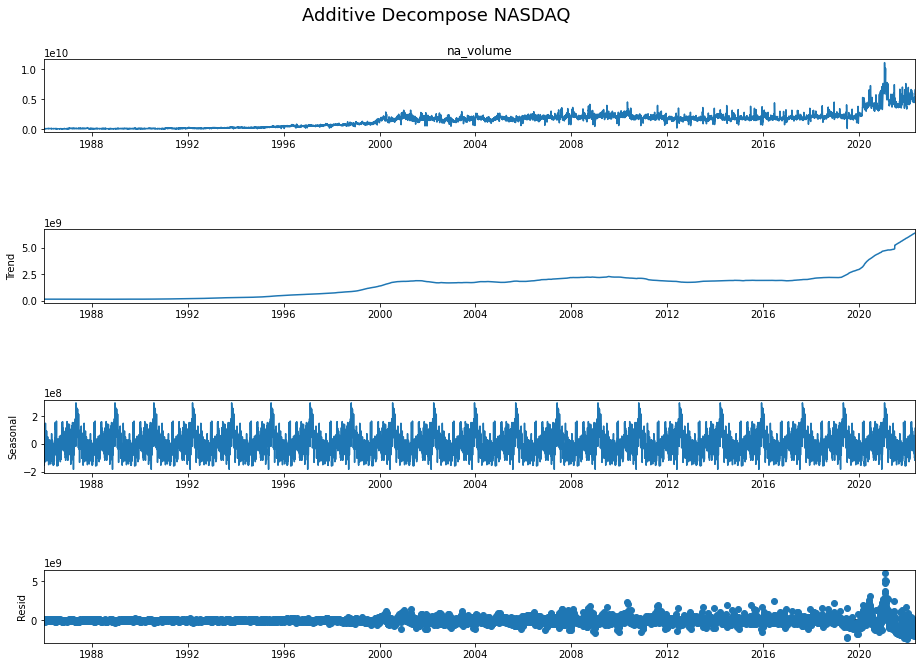

In [31]:
# Additive Decomposition (for in-depth fluctuation study)

result_add = seasonal_decompose(df_stock['na_volume'], 
                                model='additive', 
                                extrapolate_trend='freq',
                                period=400)
# Plot
fig = result_add.plot()
fig.suptitle('Additive Decompose NASDAQ', fontsize=18)
fig.set_size_inches((14,10))
plt.show()

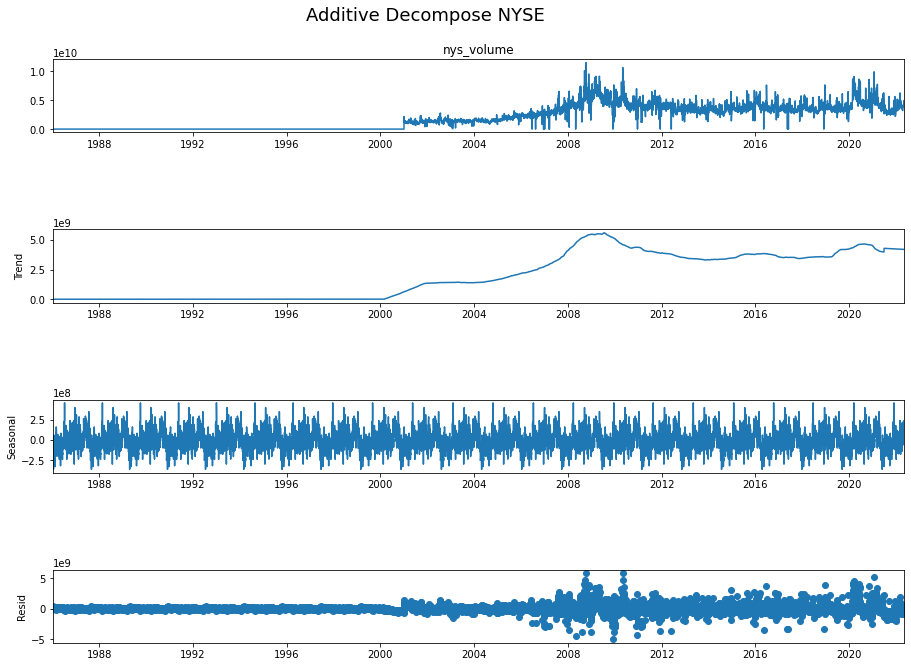

In [32]:
# Additive Decomposition

result_add = seasonal_decompose(df_stock['nys_volume'], 
                                model='additive', 
                                extrapolate_trend='freq',
                                period=400)
# Plot
fig = result_add.plot()
fig.suptitle('Additive Decompose NYSE', fontsize=18)

fig.set_size_inches((14,10))
plt.show()

Recessions didn't affected NASDAQ trading volume much, but the worldwide covid-pandemic did. People had faith in the recovery.


***Here, we can conclude that NASDAQ index securities may be a good choice for a passive investor who can hold their positions for long term.***

### EVIDENCE 2 - Annual Avg

### Yearly Opening Avg. NASDAQ & NYSE 

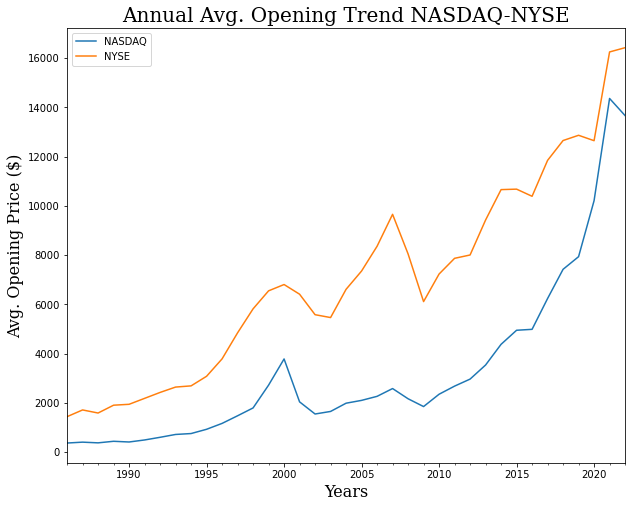

In [33]:
# BA method used for resampling - Bootstrapped Approach: Avoids repetation of sampling, 
#.                                does with replacement.

plt.figure(figsize=(10,8))
df_stock['na_close'].resample('BA').mean().plot()
df_stock['nys_close'].resample('BA').mean().plot()

plt.legend(['NASDAQ','NYSE'])
auto_label('Years','Avg. Opening Price ($)', 'Annual Avg. Opening Trend NASDAQ-NYSE')
plt.show()

NYSE showcases Dynamic Behavior in opening position patterns whereas,

NASDAQ has smooth opening transition, which means better for Passive Investor

### EVIDENCE 3 - Fluctuations

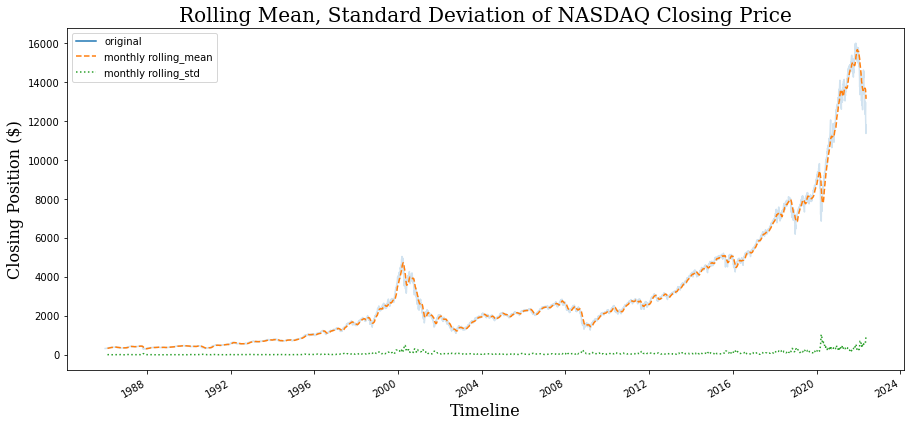

In [34]:
rolling = df_stock['na_close'].rolling(30, center =False)

fluc = pd.DataFrame({'original': df_stock['na_close'],
                     'monthly rolling_mean': rolling.mean(),
                     'monthly rolling_std': rolling.std()})

ax = fluc.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.2)

auto_label('Timeline','Closing Position ($)', 'Rolling Mean, Standard Deviation of NASDAQ Closing Price')
plt.show()

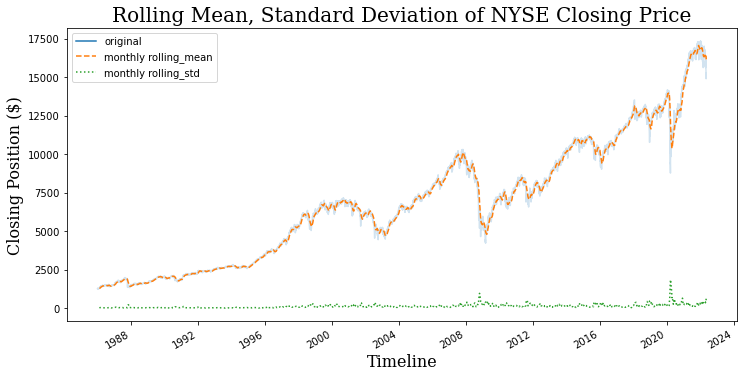

In [35]:
rolling = df_stock['nys_close'].rolling(30, center =False)

fluc = pd.DataFrame({'original': df_stock['nys_close'],
                     'monthly rolling_mean': rolling.mean(),
                     'monthly rolling_std': rolling.std()})


ax = fluc.plot(style=['-', '--', ':'], figsize = (12,6))
ax.lines[0].set_alpha(0.2)

auto_label('Timeline','Closing Position ($)', 'Rolling Mean, Standard Deviation of NYSE Closing Price')

plt.show()

### Covid Response from NYSE and NASDAQ market

In [36]:
corr_df = pd.DataFrame({'nyse':df_stock['nys_close'],'nasdaq':df_stock['na_close']})

In [37]:
corr_df.corr()

,nyse,nasdaq
nyse,1.00000,0.89766
nasdaq,0.89766,1.00000


Depicts a strong correlation, it is due to many reasons like:

    1. Global Companies are dually listed (607)
    2. Almost all stock markets depend on common factors as GDP, Global Events.

In [38]:
def test_result(s,p):
    if p<0.05:
        print('Rejecting the null hypothesis. P =', p)
    else:
        print('Accepting the null hypothesis. P=', p)
    

#### Normality Test
Null Hypothesis for checking normality: Input parameter has normal distribution.

In [39]:
s,p = normaltest(df_stock['na_close'])
print('Normality test for NASDAQ Closing Price')
test_result(s,p)


Normality test for NASDAQ Closing Price
Rejecting the null hypothesis. P = 0.0


In [40]:
s,p = normaltest(df_stock['nys_close'])
print('Normality test for NYSE Closing Price')
test_result(s,p)

Normality test for NYSE Closing Price
Rejecting the null hypothesis. P = 2.0832787508566406e-99


#### Variance test

Null Hypothesis for checking variance: NASDAQ and NYSE closing price have equal variance.

In [41]:
s,p=levene(df_stock['na_close'],df_stock["nys_close"], center='median')
print('Levene equal variance test:')
test_result(s,p)

Levene equal variance test:
Rejecting the null hypothesis. P = 1.2379323907494702e-215


In [42]:
s,p=bartlett(df_stock['na_close'],df_stock["nys_close"])
print('Barlett equal variance test:')
test_result(s,p)

Barlett equal variance test:
Rejecting the null hypothesis. P = 5.8626059294719674e-89


#### Student's T Test for non-similar variance.

Null Hypothesis: Both performed similarly during covid.

Alternate Hypothesis: Both performed differently during covid.

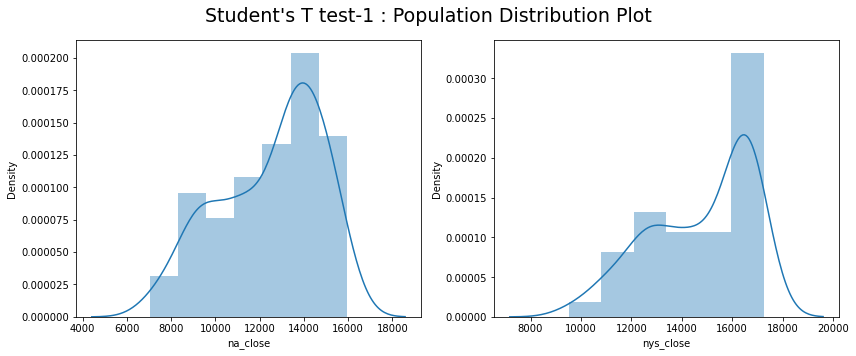

Rejecting the null hypothesis. P = 1.6136392985929896e-14


In [43]:
na_performance = df_stock['2020':'2022']['na_close'].resample('W').mean()
nyse_performance = df_stock['2020':'2022']['nys_close'].resample('W').mean()

plt.figure(figsize=(12,5))
plt.suptitle("Student's T test-1 : Population Distribution Plot", size=19)
plt.subplot(1,2,1)
sns.distplot(na_performance)

plt.subplot(1,2,2)
sns.distplot(nyse_performance)

plt.tight_layout()
plt.show()

s,p = ttest_ind(na_performance,nyse_performance, equal_var=False) #parameters doesn't have equal variance.
test_result(s,p)

In [44]:
print(f'''Mean of NASDAQ closing price during Covid: {na_performance.mean()} 
Mean of NYSE closing price during Covid: {nyse_performance.mean()}''')

Mean of NASDAQ closing price during Covid: 12476.7694377715 
Mean of NYSE closing price during Covid: 14743.387575508741


### Helpful Queries

In [45]:
def query_stock(df):
    print('--------------------------Custom Query Function-----------------------------\n')
    print('\033[1m'+'1.Which Monday had highest Gain for all stocks?\n'+'\033[0m')
    mon = df.resample('W-Mon').mean()
    def print_date_h(col_name,name):
        d=mon[mon[col_name]==mon[col_name].max()].index[0].date()
        print(name, '- Monday with highest high',d)
    print_date_h('na_high','NASDAQ')
    print_date_h('nys_high','NYSE')
    print_date_h('t_high','TSX')
    print_date_h('u_high','UKX')
    print_date_h('b_high','BSE')
    
    print('----------------------------------------------------------------------------')
    
    print('\033[1m'+'\n2.Which Friday had Lowest Losers for all stocks?\n'+'\033[0m')
    fri = df.resample('W-Fri').mean()
    def print_date(col_name,name):
        d=fri[fri[col_name]==fri[col_name].min()].index[0].date()
        print(name, '- Friday with lowest low',d)
    print_date('na_low','NASDAQ')
    print_date('nys_low','NYSE')
    print_date('t_low','TSX')
    print_date('u_low','UKX')
    print_date('b_low','BSE')
    
    print('----------x-----------------x----------------x-----------------x------------')

In [46]:
query_stock(df_stock)

--------------------------Custom Query Function-----------------------------

1.Which Monday had highest Gain for all stocks?

NASDAQ - Monday with highest high 2021-11-22
NYSE - Monday with highest high 2022-01-17
TSX - Monday with highest high 2022-04-04
UKX - Monday with highest high 2018-05-28
BSE - Monday with highest high 2021-10-25
----------------------------------------------------------------------------

2.Which Friday had Lowest Losers for all stocks?

NASDAQ - Friday with lowest low 1987-12-11
NYSE - Friday with lowest low 1986-01-24
TSX - Friday with lowest low 1986-02-14
UKX - Friday with lowest low 1986-01-24
BSE - Friday with lowest low 1988-04-01
----------x-----------------x----------------x-----------------x------------


UKX is not a great investment opportunity currently.Its highest was before 4 years in 2018 and after that the growth is stagnant.

# Bitcoin Market

### Currencies and Markets Analyzed
1. Bitcoin 
2. Ethereum
3. Doge Coin
4. Binance Market
5. Bitbasket Market

In [47]:
## Loading data
df_bc = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/crypto/bitcoin.csv")
df_dc = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/crypto/DOGE-USD.csv")
df_eth = pd.read_csv("/Users/dakshintwala/Spring 22/DATA 601/Final/crypto/ETH-USD.csv") 

In [48]:
df_binance = pd.read_csv('/Users/dakshintwala/Spring 22/DATA 601/Final/crypto/2019-10-16_21Binance.csv')
df_bitbasket = pd.read_csv('/Users/dakshintwala/Spring 22/DATA 601/Final/crypto/2018-11-22_21BitBasket.csv')

### Cleaning

In [49]:
# Renaming the columns

df_bc = df_bc.rename(columns={'Date':'date',
                                     ' Open':'bc_open',
                                     ' High':'bc_high',
                                     ' Low':'bc_low',
                                     ' Close':'bc_close'}
                 )

df_dc = df_dc.rename(columns={'Date':'date',
                                     'Open':'dc_open',
                                     'High':'dc_high',
                                     'Low':'dc_low',
                                     'Close':'dc_close',
                                     'Adj Close':'dc_adj_close',
                                     'Volume':'dc_volume'}
            )

df_eth = df_eth.rename(columns={'Date':'date',
                                     'Open':'e_open',
                                     'High':'e_high',
                                     'Low':'e_low',
                                     'Close':'e_close',
                                     'Adj Close':'e_adj_close',
                                     'Volume':'e_volume'}
                
            )

df_binance = df_binance.rename(columns={'Date':'date',
                                     ' Open':'bin_open',
                                     ' High':'bin_high',
                                     ' Low':'bin_low',
                                     ' Close':'bin_close',
                                     ' Volume':'bin_volume'}    
            )

df_bitbasket = df_bitbasket.rename(columns={'Date':'date',
                                     ' Open':'bb_open',
                                     ' High':'bb_high',
                                     ' Low':'bb_low',
                                     ' Close':'bb_close',
                                     ' Volume':'bb_volume'}
                
            )

In [50]:
## Date column format change to date time.
unify_date(df_bc)
unify_date(df_dc)
unify_date(df_eth)
unify_date(df_binance)
unify_date(df_bitbasket)



Done!
Done!
Done!
Done!
Done!


In [51]:
## Sorting according to dates
df_bc = df_bc.sort_values('date')
df_dc = df_dc.sort_values('date')
df_eth = df_eth.sort_values('date')
df_binance = df_binance.sort_values('date')
df_bitbasket = df_bitbasket.sort_values('date')

In [52]:
## Using eval() to ease the process
def shape_find(ls):
    for i in ls:
        temp = eval('df_'+i)
        print('Shape of df_'+i+' is:',temp.shape)

In [53]:
shape_find(['bc','dc','eth','binance','bitbasket'])

Shape of df_bc is: (3981, 5)
Shape of df_dc is: (1652, 7)
Shape of df_eth is: (1653, 7)
Shape of df_binance is: (433, 6)
Shape of df_bitbasket is: (867, 6)


### Merge

In [54]:
## Merging with date column
coins_d_e = df_dc.merge(df_eth, on='date')
coin_market = df_binance.merge(df_bitbasket, on='date')

### Reindex

In [55]:
## Reindexing 3 main datasets:
df_bc_copy = df_bc # For later use.
coins_d_e_copy = coins_d_e  # For later use.
coin_market_copy = coin_market # For later use.

df_bc = df_bc.set_index('date')
coins_d_e = coins_d_e.set_index('date')
coin_market = coin_market.set_index('date')

### Data Exploration

In [56]:
df_bc.tail(3)

,bc_open,bc_high,bc_low,bc_close
date,,,,
2022-05-15,29370,31061,29345,30991
2022-05-16,30991,31346,29179,29880
2022-05-17,29880,30721,29465,30081


In [57]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3981 entries, 2010-07-18 to 2022-05-17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   bc_open   3981 non-null   int64
 1   bc_high   3981 non-null   int64
 2   bc_low    3981 non-null   int64
 3   bc_close  3981 non-null   int64
dtypes: int64(4)
memory usage: 155.5 KB


Records of Bitcoin Performance: 3981

In [58]:
coins_d_e.head(3)

,dc_open,dc_high,dc_low,dc_close,dc_adj_close,dc_volume,e_open,e_high,e_low,e_close,e_adj_close,e_volume
date,,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,298.585999,319.453003,298.191986,314.681000,314.681000,842300992


In [59]:
coins_d_e.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1652 entries, 2017-11-09 to 2022-05-18
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dc_open       1652 non-null   float64
 1   dc_high       1652 non-null   float64
 2   dc_low        1652 non-null   float64
 3   dc_close      1652 non-null   float64
 4   dc_adj_close  1652 non-null   float64
 5   dc_volume     1652 non-null   int64  
 6   e_open        1652 non-null   float64
 7   e_high        1652 non-null   float64
 8   e_low         1652 non-null   float64
 9   e_close       1652 non-null   float64
 10  e_adj_close   1652 non-null   float64
 11  e_volume      1652 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 167.8 KB


Records of Ethereum, DogeCoin Performance: 1652

In [60]:
coin_market.head(3)

,bin_open,bin_high,bin_low,bin_close,bin_volume,bb_open,bb_high,bb_low,bb_close,bb_volume
date,,,,,,,,,,
2019-10-16,1.43,1.43,1.39,1.39,2813.999875,2.48,2.48,2.42,2.42,30240
2019-10-21,1.43,1.44,1.43,1.44,3919.999826,2.49,2.51,2.48,2.51,8792
2019-10-28,1.61,1.61,1.59,1.59,1567.999930,2.69,2.72,2.69,2.72,41880


In [61]:
coin_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 433 entries, 2019-10-16 to 2022-05-13
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bin_open    433 non-null    float64
 1   bin_high    433 non-null    float64
 2   bin_low     433 non-null    float64
 3   bin_close   433 non-null    float64
 4   bin_volume  433 non-null    float64
 5   bb_open     433 non-null    float64
 6   bb_high     433 non-null    float64
 7   bb_low      433 non-null    float64
 8   bb_close    433 non-null    float64
 9   bb_volume   433 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 37.2 KB


Records of Binance,Bitbasket Market Performance: 433

No anomalies detected in data exploration.

## Distributions

In [62]:
def normality_check(df):
    for i in df.columns:
        s,p = normaltest(df[i])
        print('For '+i+': ')
        test_result(s,p)
        print('-------------')

In [63]:
normality_check(coins_d_e)

For dc_open: 
Rejecting the null hypothesis. P = 3.2314076747233644e-150
-------------
For dc_high: 
Rejecting the null hypothesis. P = 2.516027533022428e-167
-------------
For dc_low: 
Rejecting the null hypothesis. P = 2.1151301752740586e-131
-------------
For dc_close: 
Rejecting the null hypothesis. P = 1.991037299075278e-150
-------------
For dc_adj_close: 
Rejecting the null hypothesis. P = 1.991037299075278e-150
-------------
For dc_volume: 
Rejecting the null hypothesis. P = 0.0
-------------
For e_open: 
Rejecting the null hypothesis. P = 3.879985349864241e-60
-------------
For e_high: 
Rejecting the null hypothesis. P = 4.360027728081432e-59
-------------
For e_low: 
Rejecting the null hypothesis. P = 1.9915906047619078e-61
-------------
For e_close: 
Rejecting the null hypothesis. P = 7.020394074084315e-60
-------------
For e_adj_close: 
Rejecting the null hypothesis. P = 7.020394074084315e-60
-------------
For e_volume: 
Rejecting the null hypothesis. P = 7.710196138750608e

In [64]:
normality_check(df_bc)

For bc_open: 
Rejecting the null hypothesis. P = 0.0
-------------
For bc_high: 
Rejecting the null hypothesis. P = 0.0
-------------
For bc_low: 
Rejecting the null hypothesis. P = 0.0
-------------
For bc_close: 
Rejecting the null hypothesis. P = 0.0
-------------


In [65]:
normality_check(coin_market)

For bin_open: 
Rejecting the null hypothesis. P = 7.495927092000197e-32
-------------
For bin_high: 
Rejecting the null hypothesis. P = 4.5123260693160916e-30
-------------
For bin_low: 
Rejecting the null hypothesis. P = 1.3999997813859405e-33
-------------
For bin_close: 
Rejecting the null hypothesis. P = 1.927453222143946e-30
-------------
For bin_volume: 
Rejecting the null hypothesis. P = 9.491423099623566e-165
-------------
For bb_open: 
Rejecting the null hypothesis. P = 2.8793106867017068e-06
-------------
For bb_high: 
Rejecting the null hypothesis. P = 2.062730853691359e-06
-------------
For bb_low: 
Rejecting the null hypothesis. P = 3.538038007741701e-06
-------------
For bb_close: 
Rejecting the null hypothesis. P = 3.108435453649807e-06
-------------
For bb_volume: 
Rejecting the null hypothesis. P = 1.055434736438411e-105
-------------


None are following normal distribution

## Comparison Plots

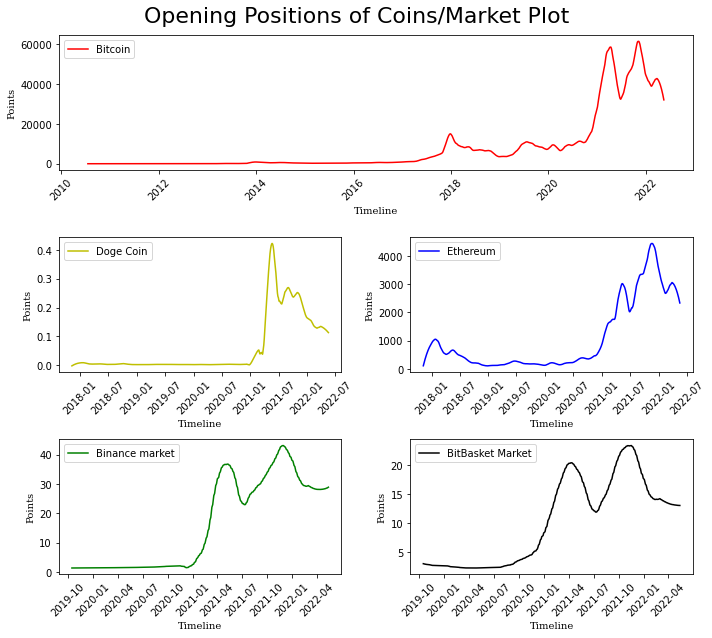

In [66]:
## Openings of all coins

plt.figure(figsize=(10,9))
plt.suptitle('Opening Positions of Coins/Market Plot', size=22)
#Bitcoin
plt.subplot(3,1,1)
plt.plot(df_bc_copy['date'],
         savgol_filter(df_bc['bc_open'],101,2),   
         color='r',
         label='Bitcoin')
plt.xticks(rotation=45)
plt.legend()
auto_label('Timeline','Points',sl=10)

#Doge Coin
plt.subplot(3,2,3)
plt.plot(coins_d_e_copy['date'],
         savgol_filter(coins_d_e_copy['dc_open'],101,2),   
         color='y',
         label='Doge Coin')
plt.xticks(rotation=45)
plt.legend()
auto_label('Timeline','Points',sl=10)

#Ethereum
plt.subplot(3,2,4)
plt.plot(coins_d_e_copy['date'],
         savgol_filter(coins_d_e_copy['e_open'],101,2),   
         color='b',
         label='Ethereum')
plt.xticks(rotation=45)
plt.legend()
auto_label('Timeline','Points',sl=10)

#Binance market
plt.subplot(3,2,5)
plt.plot(coin_market_copy['date'],
         savgol_filter(coin_market['bin_open'],101,2),   
         color='g',
         label='Binance market')
plt.xticks(rotation=45)
plt.legend()
auto_label('Timeline','Points',sl=10)

#Bitbasket Market
plt.subplot(3,2,6)
plt.plot(coin_market_copy['date'],
         savgol_filter(coin_market['bb_open'],101,2),   
         color='k',
         label='BitBasket Market')
plt.xticks(rotation=45)
plt.legend()

auto_label('Timeline','Points',sl=10)
plt.tight_layout()
plt.show()

**Interesting Findings**

Concave and Convex performance Rule, 

Bitcoin - Concave - High returns possibilities,

Ethereum - Convex - Low returns Possibilities.

***Other Findings***
1. Cryptocurrency Markets - Binance, Bitbasket saw a rise in opening positions, probably because people started trying crypto during the work-from-home practice.

2. Bitcoin didn't see big bump in 2020 pandemic period, the currency was on upward trend from 2018

3. Ethereum and Doge coin showed similar behavior, but ethereum fluctuated more than dogecoin.

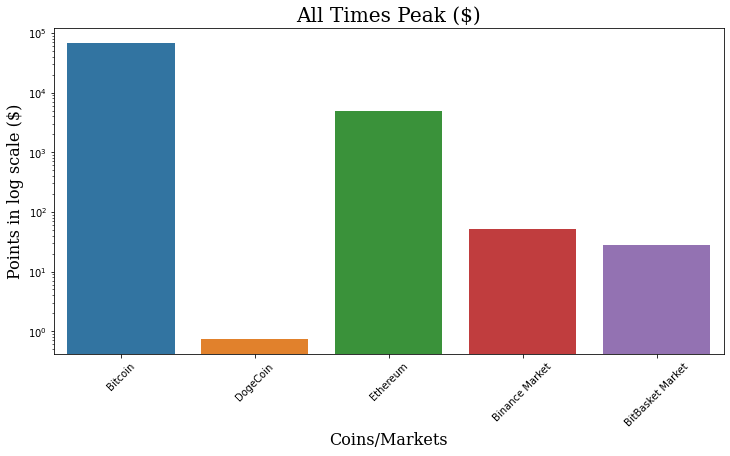

In [67]:
# All times High
plt.figure(figsize=(12,6))
highs_crypto = [df_bc['bc_high'].max(), 
                coins_d_e['dc_high'].max(), 
                coins_d_e['e_high'].max(),
                coin_market['bin_high'].max(),
                coin_market['bb_high'].max()]
names=['Bitcoin','DogeCoin','Ethereum','Binance Market','BitBasket Market']


sns.barplot(names, highs_crypto, hue=names, dodge=False)
plt.yscale('log')
plt.legend('',frameon=False)
plt.xticks(rotation=45)
auto_label('Coins/Markets','Points in log scale ($)','All Times Peak ($)')
plt.show()

Bitcoin and Ethereum are high performers.

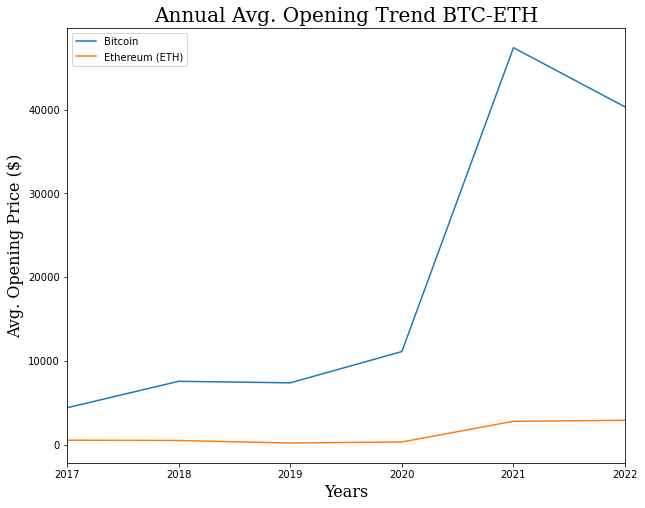

In [68]:
## Annual Avg. Performance - Bitcoin and Ethereum

# BA method used for resampling - Business Year Method

plt.figure(figsize=(10,8))
df_bc['bc_close']['2017':].resample('BA').mean().plot()
coins_d_e['e_close'].resample('BA').mean().plot()

plt.legend(['Bitcoin','Ethereum (ETH)'])
auto_label('Years','Avg. Opening Price ($)', 'Annual Avg. Opening Trend BTC-ETH')
plt.show()

ETH started trading in 2015, our data is from 2017 for ETH.
Bitcoin started trading in 2010.

**Growth Rate : Bitcoin >> Ethereum ***

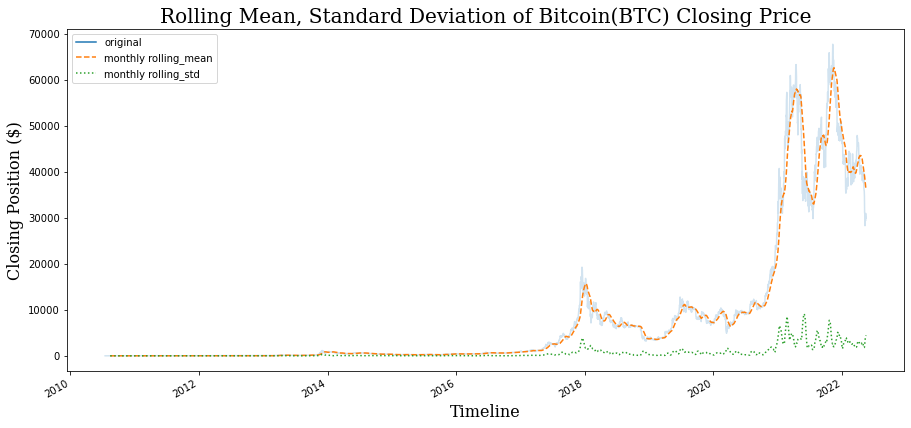

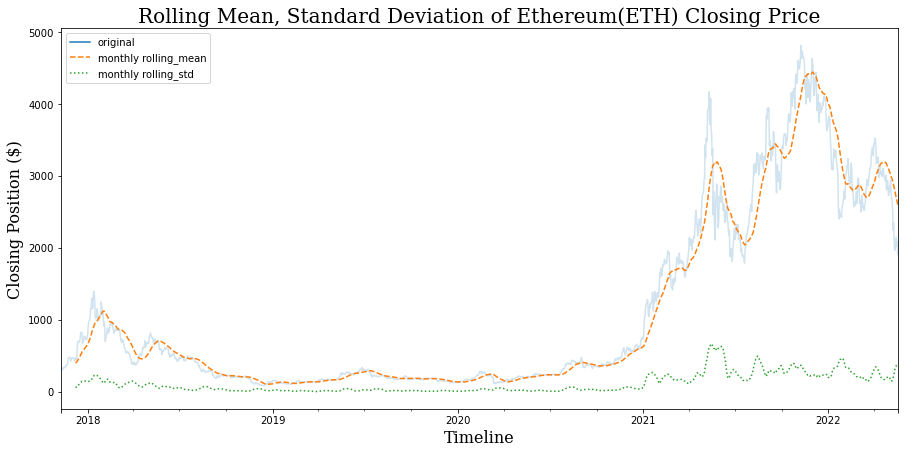

In [69]:
rolling = df_bc['bc_close'].rolling(30, center =False)

fluc = pd.DataFrame({'original': df_bc['bc_close'],
                     'monthly rolling_mean': rolling.mean(),
                     'monthly rolling_std': rolling.std()})

ax = fluc.plot(style=['-', '--', ':'], figsize=(15,7))
ax.lines[0].set_alpha(0.2)

auto_label('Timeline','Closing Position ($)', 'Rolling Mean, Standard Deviation of Bitcoin(BTC) Closing Price')
plt.show()


rolling = coins_d_e['e_close'].rolling(30, center =False)

fluc = pd.DataFrame({'original': coins_d_e['e_close'],
                     'monthly rolling_mean': rolling.mean(),
                     'monthly rolling_std': rolling.std()})

ax = fluc.plot(style=['-', '--', ':'], figsize=(15,7))
ax.lines[0].set_alpha(0.2)

auto_label('Timeline','Closing Position ($)', 'Rolling Mean, Standard Deviation of Ethereum(ETH) Closing Price')


plt.show()

**Recovery Period of Bitcoin is smaller than that of Ethereum.**

For an investor, Bitcoin offers more opportunity to earn gains in stressed-market condition.

## Recommendation : NYSE or BTC

In [70]:
## Comparing from 2012 to 2022

nyse_re = df_stock['2012':'2022']['nys_close'].resample('W').mean()
btc_re = df_bc['2012':'2022']['bc_close'].resample('W').mean()
btc_re = btc_re[:-2]

In [71]:
s,p=levene(nyse_re,btc_re, center='median')
print('Levene equal variance test:')
test_result(s,p)

Levene equal variance test:
Rejecting the null hypothesis. P = 3.1672960193997634e-25


In [72]:
s,p=bartlett(nyse_re,btc_re)
print('Bartlett equal variance test:')
test_result(s,p)

Bartlett equal variance test:
Rejecting the null hypothesis. P = 9.438156548346066e-281


Unequal Variance of both NYSE and BTC data

### Stating Hypothesis
Null Hypothesis: NYSE and BTC behave similarly.
Alternative Hypothesis: They behave differently.

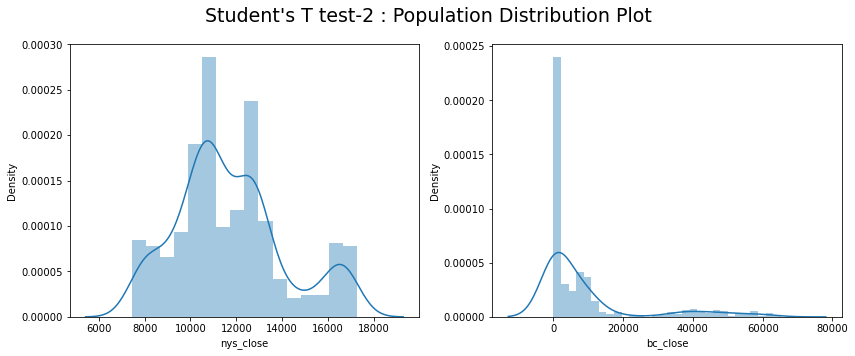

Rejecting the null hypothesis. P = 4.6283201171847915e-05


In [73]:
plt.figure(figsize=(12,5))
plt.suptitle("Student's T test-2 : Population Distribution Plot", size=19)
plt.subplot(1,2,1)
sns.distplot(nyse_re)

plt.subplot(1,2,2)
sns.distplot(btc_re)

plt.tight_layout()
plt.show()

s,p = ttest_ind(nyse_re,btc_re, equal_var=False) #parameters doesn't have equal variance.
test_result(s,p)

As we can see from student's t test, they both behaved differently.

In [74]:
print("NYSE (2012-2022) Mean :", nyse_re.mean())
print("BTC (2012-2022) Mean :", btc_re.mean())

NYSE (2012-2022) Mean : 11711.019070832084
BTC (2012-2022) Mean : 8997.348516855913


# Results

***It is clear, that Stock Market is more safe, growth efficient, reliable investment than a Crypto Currency.***

***Recommendation: Passive Investor shoould invest in NYSE market rather than going for the Bitcoin.***

# Summary

Most of the investment instruments took a major hit during covid pandemic, dot com crash and 2008 recession which is reflected in all stock markets that were studied in this project. Crypto currencies didn't faced any major backlash due to covid but had some random crashes due to other affecting events, like government announcements on crypto currency, world events like Russia-Ukrain War, Afghanistan takeover, etc. 

On analysing five stock markets around the world that is, NYSE and NASDAQ from USA, TSX from Canada, UKX from United Kingdom, BSE from India; it was found that the most growth oriented and reliable investment market is **NYSE for someone looking for higher marginal interests in future. NYSE is also considered world's largest stock market which supports our project conclusion.*** BSE-Bombay stock exchange from India showed lowest growth rate among all stock markets in comparison.

After studying crypto-currency market, I realised that ***Bitcoin, the original and first of its kind crypto-currency, was most relaible investment tool in Crypto-Market.*** Other coins such as Ethereum, Doge Coin failed to perform well and show the stability. Talking about crypto-currency index such as Binance, Bigbasket which are just recently launched, they showed slower growth rate than bitcoin. Due to their short lifecycle, the data is not enough to comment on their reliability. 

### References:

    1. https://www.tutorialspoint.com/shading-an-area-between-two-points-in-a-matplotlib-plot
    2. https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/
    3. https://towardsdatascience.com/most-useful-python-functions-for-time-series-analysis-ed1a9cb3aa8b
    4. https://stackoverflow.com/questions/5735208/remove-the-legend-on-a-matplotlib-figure
    5. https://github.com/daksh-intwala/DATA_601/blob/master/Midterm/EDA_Midterm.ipynb
        